# Potato leaf disese Classifier


In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle = "True",
    image_size = (256,256),
    batch_size = 32,
    )

Found 2152 files belonging to 3 classes.


In [5]:
class_name = dataset.class_names
print(class_name)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [6]:
len(dataset)

68

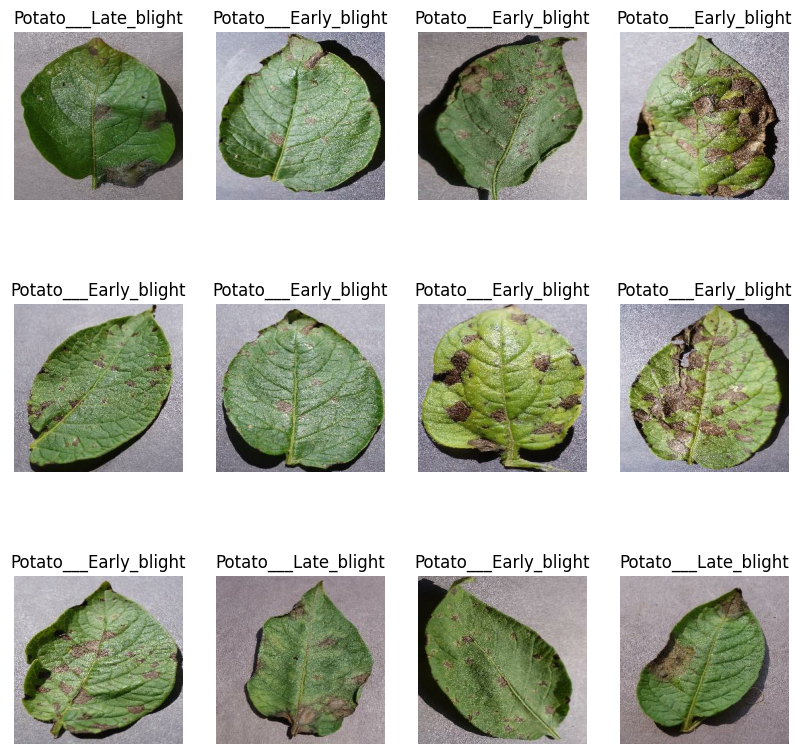

In [7]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')
   

In [8]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [11]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [14]:
def get_dataset_partition_tf(ds , train_split = 0.8 , val_split = 0.1, test_split = 0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(54)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [15]:
train_ds , val_ds, test_ds = get_dataset_partition_tf(dataset)

In [16]:
len(train_ds)

54

In [17]:
len(val_ds)

6

In [18]:
len(test_ds)

8

In [19]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [20]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [22]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64 , kernel_size = (3,3) ,activation = 'relu',),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, kernel_size = (3,3) ,activation = 'relu',),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, kernel_size = (3,3) ,activation = 'relu',),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    
    layers.Dense(64, activation = 'relu'),

    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [40]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy']
             ) 

In [41]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50


54/54 [==============================] - 114s 2s/step - loss: 0.9013 - accuracy: 0.4925 - val_loss: 0.8044 - val_accuracy: 0.6510
Epoch 2/50
54/54 [==============================] - 107s 2s/step - loss: 0.6891 - accuracy: 0.6927 - val_loss: 0.5715 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 109s 2s/step - loss: 0.5346 - accuracy: 0.7604 - val_loss: 0.4066 - val_accuracy: 0.8281
Epoch 4/50
54/54 [==============================] - 107s 2s/step - loss: 0.3717 - accuracy: 0.8495 - val_loss: 0.3180 - val_accuracy: 0.8854
Epoch 5/50
54/54 [==============================] - 108s 2s/step - loss: 0.2751 - accuracy: 0.8906 - val_loss: 0.4484 - val_accuracy: 0.8385
Epoch 6/50
54/54 [==============================] - 107s 2s/step - loss: 0.2596 - accuracy: 0.8999 - val_loss: 0.2566 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 108s 2s/step - loss: 0.1996 - accuracy: 0.9172 - val_loss: 0.2648 - val_accuracy: 0.8958
Epoch 8/50
54/54 [======

In [53]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 498ms/step - loss: 0.1124 - accuracy: 0.9570


In [43]:
scores

[0.11244474351406097, 0.95703125]

In [44]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [46]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

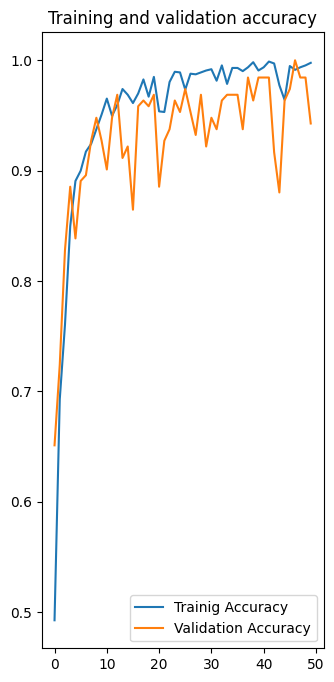

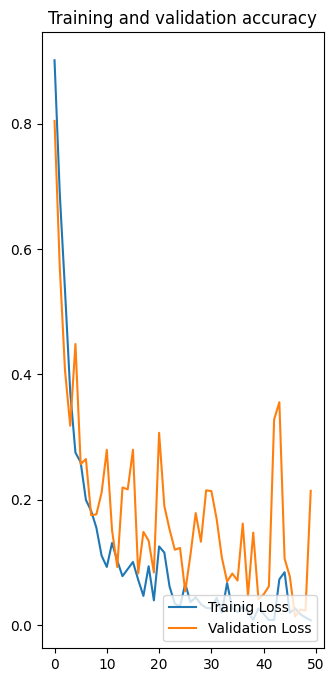

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Trainig Accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")



plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label="Trainig Loss")
plt.plot(range(EPOCHS),val_loss,label="Validation Loss")
plt.legend(loc='lower right')
plt.title("Training and validation accuracy")

First image to predict
Actual label :  Potato___Late_blight
1/1 [==============================] - 1s 1s/step
Predicted Label :  Potato___Late_blight


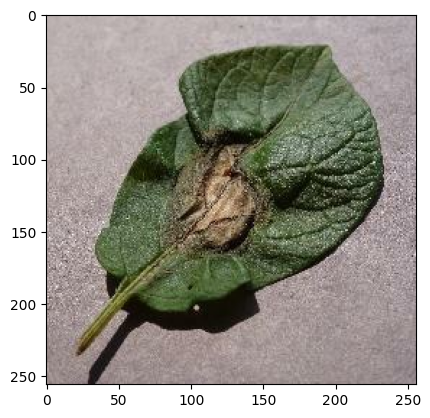

In [48]:
for image_batch ,labels_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype("uint8"))
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label : ",class_name[first_label])
    
    
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label : ",class_name[np.argmax(batch_prediction[0])])

In [49]:
def predict(model , img):
    img_arry = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_arry = tf.expand_dims(img_arry,0) #create batchhh MAbd
    
    prediction = model.predict(img_arry)
    
    predicted_class = class_name[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class , confidence

1/1 [==============================] - 0s 43ms/step


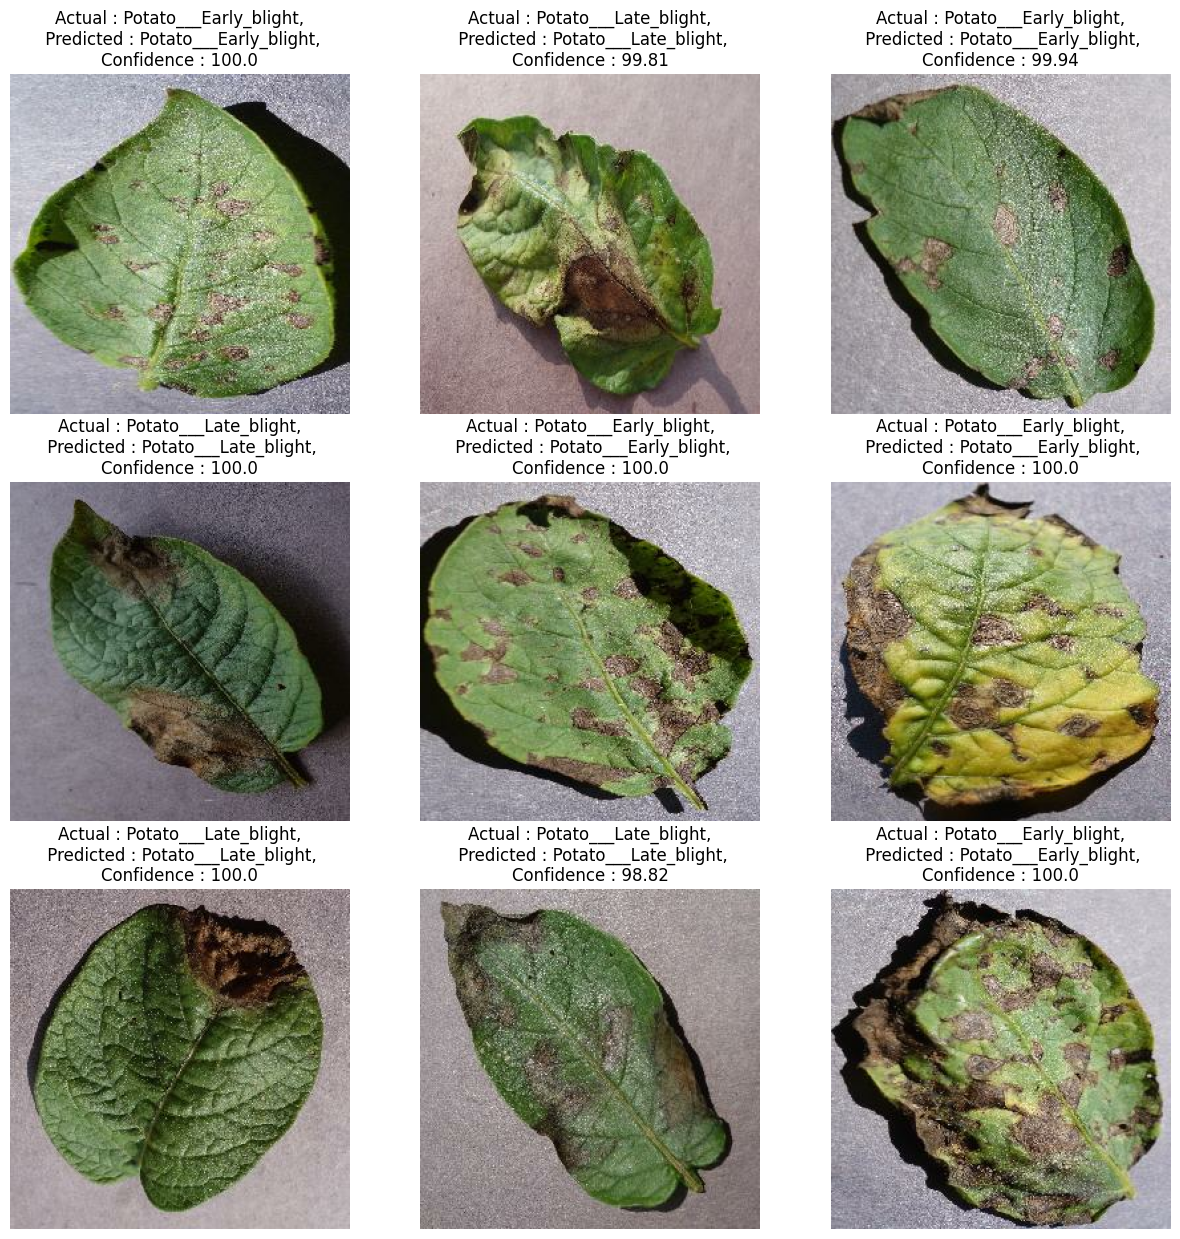

In [50]:
plt.figure(figsize = (15,15))
for image , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        
        plt.imshow(image[i].numpy().astype('uint8'))
        
        predicted_class , confidence = predict(model , image[i].numpy())
        actual_class = class_name[labels[i]]
        
        
        plt.title(f"Actual : {actual_class},\n Predicted : {predicted_class},\nConfidence : {confidence}")
        
        plt.axis("off")

In [51]:
model_version = 1

In [52]:
import os 
model_version = max([int(i) for i in os.listdir("../models") + [0]]) + 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets


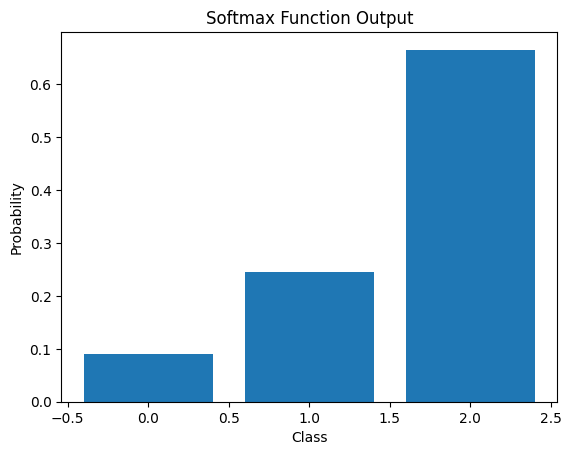

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Create an input vector
x = np.array([1.0, 2.0, 3.0])

# Compute the softmax probabilities
probabilities = softmax(x)

# Create a bar plot to visualize the probabilities
plt.bar(np.arange(len(probabilities)), probabilities)
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Softmax Function Output')
plt.show()
